# Data integration

In [1]:
import psycopg2
import pandas as pd

## Write your password 
connection={
    'host':'localhost',
    'dbname':'covid_income',
    'user':'postgres',
    'password': 'Roxanne03#',
    'schema':'raw_data',
}

conn_string = 'host={} dbname={} user={} password={}'.format(connection['host'],connection['dbname'],connection['user'],connection['password'])
conn = psycopg2.connect(conn_string)
cursor = conn.cursor()

def query(querystring):
    conn.rollback()
    cursor.execute(querystring)
    records = cursor.fetchall()
    records=pd.DataFrame(records,columns=[i[0] for i in cursor.description])
    return records

In [7]:
covid_df=query('select * from raw_data.covid_19')
covid_df.head()

,row_id,date_of_birth,gender_at_birth,ethnicity,race_primary,races_all,patient_id,cohort_reference_event_age_at_event,cohort_reference_event_estimated_result,cohort_reference_event_lab_test,cohort_reference_event_result_numeric,cohort_reference_event_result_textual,cohort_reference_event_result_status,cohort_reference_event_result_value_code,cohort_reference_event_reference_range,zip_code_employment_status,zip_code_home_3_digit_zipcode,event_collection_date_time
0,1,2002,MALE,38003564,Black or African American,Black or African American,censored,19.826793,None,SARS-CoV-2 (COVID-19) RNA [Presence] in Nasoph...,NaN,Detected,Final,Detected,Not Detected,Patient data not recorded,631,2022-01
1,2,1999,MALE,38003564,Black or African American,Black or African American,censored,22.509453,None,SARS-CoV-2 (COVID-19) RNA [Presence] in Nasoph...,NaN,Detected,Final,Detected,Not Detected,Patient data not recorded,631,2022-01
2,3,2003,MALE,38003564,Black or African American,Black or African American,censored,18.583190,None,SARS-CoV-2 (COVID-19) RNA [Presence] in Nasoph...,NaN,Detected,Final,Detected,Not Detected,Patient data not recorded,631,2022-01
3,4,2005,MALE,38003564,Black or African American,Black or African American,censored,18.245166,None,SARS-CoV-2 (COVID-19) RNA [Presence] in Nasoph...,NaN,Detected,Final,Detected,Not Detected,Patient data not recorded,631,2023-11
4,5,1998,MALE,38003564,Black or African American,Black or African American,censored,24.629774,None,SARS-CoV-2 (COVID-19) RNA [Presence] in Nasoph...,NaN,Detected,Final,Detected,Not Detected,Patient data not recorded,631,2023-11


In [9]:
income_df=query('select * from raw_data.acs_income')
income_df.head()

,three_digit_zip_code,average_household_income_2020,average_household_income_2021,average_household_income_2022,mean_household_income,zip_code
0,516,62738.165585,69420.000000,76057.500000,67215.248920,51635.000000
1,525,59117.706045,62837.195335,60713.750000,60889.550460,52557.500000
2,526,50810.000000,55895.000000,62522.477520,56409.159170,52626.000000
3,527,71217.500000,NaN,NaN,71217.500000,52761.000000
4,600,103644.376755,105617.353902,112106.694919,106324.085082,60051.323077


In [13]:
covid_df['three_digit_zip_code'] = covid_df['zip_code_home_3_digit_zipcode']
covid_df.drop(columns=['zip_code_home_3_digit_zipcode'], inplace=True)
covid_df

,row_id,date_of_birth,gender_at_birth,ethnicity,race_primary,races_all,patient_id,cohort_reference_event_age_at_event,cohort_reference_event_estimated_result,cohort_reference_event_lab_test,cohort_reference_event_result_numeric,cohort_reference_event_result_textual,cohort_reference_event_result_status,cohort_reference_event_result_value_code,cohort_reference_event_reference_range,zip_code_employment_status,event_collection_date_time,three_digit_zip_code
0,1,2002,MALE,38003564,Black or African American,Black or African American,censored,19.826793,None,SARS-CoV-2 (COVID-19) RNA [Presence] in Nasoph...,NaN,Detected,Final,Detected,Not Detected,Patient data not recorded,2022-01,631
1,2,1999,MALE,38003564,Black or African American,Black or African American,censored,22.509453,None,SARS-CoV-2 (COVID-19) RNA [Presence] in Nasoph...,NaN,Detected,Final,Detected,Not Detected,Patient data not recorded,2022-01,631
2,3,2003,MALE,38003564,Black or African American,Black or African American,censored,18.583190,None,SARS-CoV-2 (COVID-19) RNA [Presence] in Nasoph...,NaN,Detected,Final,Detected,Not Detected,Patient data not recorded,2022-01,631
3,4,2005,MALE,38003564,Black or African American,Black or African American,censored,18.245166,None,SARS-CoV-2 (COVID-19) RNA [Presence] in Nasoph...,NaN,Detected,Final,Detected,Not Detected,Patient data not recorded,2023-11,631
4,5,1998,MALE,38003564,Black or African American,Black or African American,censored,24.629774,None,SARS-CoV-2 (COVID-19) RNA [Presence] in Nasoph...,NaN,Detected,Final,Detected,Not Detected,Patient data not recorded,2023-11,631
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
15989,15990,1988,FEMALE,38003564,White,White,censored,33.069708,None,SARS-CoV-2 (COVID-19) IgG Ab [Presence] in Ser...,NaN,Nonreactive,Final,Nonreactive,None,Patient data not recorded,2021-09,622
15990,15991,1982,FEMALE,38003564,Black or African American,Black or African American,censored,41.050794,None,SARS-CoV-2 (COVID-19) Ab [Presence] in Serum o...,NaN,Positive,Final,Positive,Negative,Patient data not recorded,2023-06,631
15991,15992,1991,MALE,38003564,Black or African American,Black or African American,censored,31.950493,None,SARS-CoV-2 (COVID-19) RNA [Presence] in Nasoph...,NaN,Not Detected,Final,Not detected,Not Detected,Patient data not recorded,2023-09,633
15992,15993,1980,FEMALE,38003564,White,White,censored,43.905217,None,SARS-CoV-2 (COVID-19) RNA [Presence] in Nasoph...,NaN,Not Detected,Final,Not detected,Not Detected,Full-time employment,2024-02,631


In [21]:
# Ensure both columns are of type string
covid_df['three_digit_zip_code'] = covid_df['three_digit_zip_code'].astype(str)
income_df['three_digit_zip_code'] = income_df['three_digit_zip_code'].astype(str)

# Perform the merge
merged_df = pd.merge(
    covid_df, 
    income_df, 
    left_on='three_digit_zip_code', 
    right_on='three_digit_zip_code', 
    how='left'
)

merged_df.head()

,row_id,date_of_birth,gender_at_birth,ethnicity,race_primary,races_all,patient_id,cohort_reference_event_age_at_event,cohort_reference_event_estimated_result,cohort_reference_event_lab_test,...,cohort_reference_event_result_value_code,cohort_reference_event_reference_range,zip_code_employment_status,event_collection_date_time,three_digit_zip_code,average_household_income_2020,average_household_income_2021,average_household_income_2022,mean_household_income,zip_code
0,1,2002,MALE,38003564,Black or African American,Black or African American,censored,19.826793,None,SARS-CoV-2 (COVID-19) RNA [Presence] in Nasoph...,...,Detected,Not Detected,Patient data not recorded,2022-01,631,71888.400476,74464.572088,78878.118076,75077.030218,63123.826087
1,2,1999,MALE,38003564,Black or African American,Black or African American,censored,22.509453,None,SARS-CoV-2 (COVID-19) RNA [Presence] in Nasoph...,...,Detected,Not Detected,Patient data not recorded,2022-01,631,71888.400476,74464.572088,78878.118076,75077.030218,63123.826087
2,3,2003,MALE,38003564,Black or African American,Black or African American,censored,18.583190,None,SARS-CoV-2 (COVID-19) RNA [Presence] in Nasoph...,...,Detected,Not Detected,Patient data not recorded,2022-01,631,71888.400476,74464.572088,78878.118076,75077.030218,63123.826087
3,4,2005,MALE,38003564,Black or African American,Black or African American,censored,18.245166,None,SARS-CoV-2 (COVID-19) RNA [Presence] in Nasoph...,...,Detected,Not Detected,Patient data not recorded,2023-11,631,71888.400476,74464.572088,78878.118076,75077.030218,63123.826087
4,5,1998,MALE,38003564,Black or African American,Black or African American,censored,24.629774,None,SARS-CoV-2 (COVID-19) RNA [Presence] in Nasoph...,...,Detected,Not Detected,Patient data not recorded,2023-11,631,71888.400476,74464.572088,78878.118076,75077.030218,63123.826087


In [23]:
merged_df['zip_code'] = merged_df['zip_code'].astype(int)
merged_df.head()

,row_id,date_of_birth,gender_at_birth,ethnicity,race_primary,races_all,patient_id,cohort_reference_event_age_at_event,cohort_reference_event_estimated_result,cohort_reference_event_lab_test,...,cohort_reference_event_result_value_code,cohort_reference_event_reference_range,zip_code_employment_status,event_collection_date_time,three_digit_zip_code,average_household_income_2020,average_household_income_2021,average_household_income_2022,mean_household_income,zip_code
0,1,2002,MALE,38003564,Black or African American,Black or African American,censored,19.826793,None,SARS-CoV-2 (COVID-19) RNA [Presence] in Nasoph...,...,Detected,Not Detected,Patient data not recorded,2022-01,631,71888.400476,74464.572088,78878.118076,75077.030218,63123
1,2,1999,MALE,38003564,Black or African American,Black or African American,censored,22.509453,None,SARS-CoV-2 (COVID-19) RNA [Presence] in Nasoph...,...,Detected,Not Detected,Patient data not recorded,2022-01,631,71888.400476,74464.572088,78878.118076,75077.030218,63123
2,3,2003,MALE,38003564,Black or African American,Black or African American,censored,18.583190,None,SARS-CoV-2 (COVID-19) RNA [Presence] in Nasoph...,...,Detected,Not Detected,Patient data not recorded,2022-01,631,71888.400476,74464.572088,78878.118076,75077.030218,63123
3,4,2005,MALE,38003564,Black or African American,Black or African American,censored,18.245166,None,SARS-CoV-2 (COVID-19) RNA [Presence] in Nasoph...,...,Detected,Not Detected,Patient data not recorded,2023-11,631,71888.400476,74464.572088,78878.118076,75077.030218,63123
4,5,1998,MALE,38003564,Black or African American,Black or African American,censored,24.629774,None,SARS-CoV-2 (COVID-19) RNA [Presence] in Nasoph...,...,Detected,Not Detected,Patient data not recorded,2023-11,631,71888.400476,74464.572088,78878.118076,75077.030218,63123


In [29]:
# Transformation functions
def transform_gender(gender_at_birth):
    if gender_at_birth == 'MALE':
        return 'M'
    elif gender_at_birth == 'FEMALE':
        return 'F'
    else:
        return 'U'

merged_df['gender'] = merged_df['gender_at_birth'].apply(transform_gender)

merged_df.head()

,row_id,date_of_birth,gender_at_birth,ethnicity,race_primary,races_all,patient_id,cohort_reference_event_age_at_event,cohort_reference_event_estimated_result,cohort_reference_event_lab_test,...,cohort_reference_event_reference_range,zip_code_employment_status,event_collection_date_time,three_digit_zip_code,average_household_income_2020,average_household_income_2021,average_household_income_2022,mean_household_income,zip_code,gender
0,1,2002,MALE,38003564,Black or African American,Black or African American,censored,19.826793,None,SARS-CoV-2 (COVID-19) RNA [Presence] in Nasoph...,...,Not Detected,Patient data not recorded,2022-01,631,71888.400476,74464.572088,78878.118076,75077.030218,63123,M
1,2,1999,MALE,38003564,Black or African American,Black or African American,censored,22.509453,None,SARS-CoV-2 (COVID-19) RNA [Presence] in Nasoph...,...,Not Detected,Patient data not recorded,2022-01,631,71888.400476,74464.572088,78878.118076,75077.030218,63123,M
2,3,2003,MALE,38003564,Black or African American,Black or African American,censored,18.583190,None,SARS-CoV-2 (COVID-19) RNA [Presence] in Nasoph...,...,Not Detected,Patient data not recorded,2022-01,631,71888.400476,74464.572088,78878.118076,75077.030218,63123,M
3,4,2005,MALE,38003564,Black or African American,Black or African American,censored,18.245166,None,SARS-CoV-2 (COVID-19) RNA [Presence] in Nasoph...,...,Not Detected,Patient data not recorded,2023-11,631,71888.400476,74464.572088,78878.118076,75077.030218,63123,M
4,5,1998,MALE,38003564,Black or African American,Black or African American,censored,24.629774,None,SARS-CoV-2 (COVID-19) RNA [Presence] in Nasoph...,...,Not Detected,Patient data not recorded,2023-11,631,71888.400476,74464.572088,78878.118076,75077.030218,63123,M


In [31]:
merged_df.to_csv('merged_covid_income.csv')

# Numerical feature matrix generation

In [35]:
merged_df['age_at_event'] = merged_df['cohort_reference_event_age_at_event']
merged_df['result_code'] = merged_df['cohort_reference_event_result_textual']

merged_df.columns

Index(['row_id', 'date_of_birth', 'gender_at_birth', 'ethnicity',
       'race_primary', 'races_all', 'patient_id',
       'cohort_reference_event_age_at_event',
       'cohort_reference_event_estimated_result',
       'cohort_reference_event_lab_test',
       'cohort_reference_event_result_numeric',
       'cohort_reference_event_result_textual',
       'cohort_reference_event_result_status',
       'cohort_reference_event_result_value_code',
       'cohort_reference_event_reference_range', 'zip_code_employment_status',
       'event_collection_date_time', 'three_digit_zip_code',
       'average_household_income_2020', 'average_household_income_2021',
       'average_household_income_2022', 'mean_household_income', 'zip_code',
       'gender', 'age_at_event', 'result_code'],
      dtype='object')

In [37]:
merged_df['result_value'] = merged_df['cohort_reference_event_result_numeric']
merged_df['result_value'].head()

0   NaN
1   NaN
2   NaN
3   NaN
4   NaN
Name: result_value, dtype: float64

In [39]:
merged_df.head()

,row_id,date_of_birth,gender_at_birth,ethnicity,race_primary,races_all,patient_id,cohort_reference_event_age_at_event,cohort_reference_event_estimated_result,cohort_reference_event_lab_test,...,three_digit_zip_code,average_household_income_2020,average_household_income_2021,average_household_income_2022,mean_household_income,zip_code,gender,age_at_event,result_code,result_value
0,1,2002,MALE,38003564,Black or African American,Black or African American,censored,19.826793,None,SARS-CoV-2 (COVID-19) RNA [Presence] in Nasoph...,...,631,71888.400476,74464.572088,78878.118076,75077.030218,63123,M,19.826793,Detected,NaN
1,2,1999,MALE,38003564,Black or African American,Black or African American,censored,22.509453,None,SARS-CoV-2 (COVID-19) RNA [Presence] in Nasoph...,...,631,71888.400476,74464.572088,78878.118076,75077.030218,63123,M,22.509453,Detected,NaN
2,3,2003,MALE,38003564,Black or African American,Black or African American,censored,18.583190,None,SARS-CoV-2 (COVID-19) RNA [Presence] in Nasoph...,...,631,71888.400476,74464.572088,78878.118076,75077.030218,63123,M,18.583190,Detected,NaN
3,4,2005,MALE,38003564,Black or African American,Black or African American,censored,18.245166,None,SARS-CoV-2 (COVID-19) RNA [Presence] in Nasoph...,...,631,71888.400476,74464.572088,78878.118076,75077.030218,63123,M,18.245166,Detected,NaN
4,5,1998,MALE,38003564,Black or African American,Black or African American,censored,24.629774,None,SARS-CoV-2 (COVID-19) RNA [Presence] in Nasoph...,...,631,71888.400476,74464.572088,78878.118076,75077.030218,63123,M,24.629774,Detected,NaN


In [55]:
# Feature matrix
feature_columns = [
    'row_id', 'gender', 'age_at_event', 'race_primary', 'result_code',
    'mean_household_income', 'zip_code']
feature_matrix = merged_df[feature_columns]

print(feature_matrix.shape)
feature_matrix.head()

(15994, 7)


,row_id,gender,age_at_event,race_primary,result_code,mean_household_income,zip_code
0,1,M,19.826793,Black or African American,Detected,75077.030218,63123
1,2,M,22.509453,Black or African American,Detected,75077.030218,63123
2,3,M,18.583190,Black or African American,Detected,75077.030218,63123
3,4,M,18.245166,Black or African American,Detected,75077.030218,63123
4,5,M,24.629774,Black or African American,Detected,75077.030218,63123


In [57]:
feature_matrix.to_csv('feature_matrix.csv')

In [59]:
feature_matrix.columns

Index(['row_id', 'gender', 'age_at_event', 'race_primary', 'result_code',
       'mean_household_income', 'zip_code'],
      dtype='object')

In [61]:
# documentation on get dummies
def onehotify(dfin,colin):
    return pd.concat([dfin,pd.get_dummies(dfin[colin],prefix=colin)],axis=1).drop([colin],axis=1)

for curcol in ['gender','result_code', 'race_primary']:
    feature_matrix=onehotify(feature_matrix,curcol)

print(feature_matrix.shape)
print(feature_matrix.dtypes)
feature_matrix.head()

(15994, 21)
row_id                                             int64
age_at_event                                     float64
mean_household_income                            float64
zip_code                                           int64
gender_F                                            bool
gender_M                                            bool
result_code_<1.00                                   bool
result_code_>150.00                                 bool
result_code_Detected                                bool
result_code_Negative                                bool
result_code_Nonreactive                             bool
result_code_Not Detected                            bool
result_code_Positive                                bool
result_code_Reactive                                bool
race_primary_American Indian or Alaska Native       bool
race_primary_Asian                                  bool
race_primary_Black or African American              bool
race_primary_Other 

,row_id,age_at_event,mean_household_income,zip_code,gender_F,gender_M,result_code_<1.00,result_code_>150.00,result_code_Detected,result_code_Negative,...,result_code_Not Detected,result_code_Positive,result_code_Reactive,race_primary_American Indian or Alaska Native,race_primary_Asian,race_primary_Black or African American,race_primary_Other Pacific Islander,race_primary_Refuse to answer,race_primary_Unknown racial group,race_primary_White
0,1,19.826793,75077.030218,63123,False,True,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
1,2,22.509453,75077.030218,63123,False,True,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
2,3,18.583190,75077.030218,63123,False,True,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
3,4,18.245166,75077.030218,63123,False,True,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False
4,5,24.629774,75077.030218,63123,False,True,False,False,True,False,...,False,False,False,False,False,True,False,False,False,False


In [63]:
feature_matrix.to_csv('dummy_feature_matrix.csv')

# Normalize the above feature matrix

In [72]:
xdf = feature_matrix.drop('row_id', axis=1)

# normalize
for col in xdf.select_dtypes(include=['bool']).columns:
    xdf[col] = xdf[col].astype(int)
scaledxdf=(xdf-xdf.min())/(xdf.max()-xdf.min())

scaledxdf.head()

,age_at_event,mean_household_income,zip_code,gender_F,gender_M,result_code_<1.00,result_code_>150.00,result_code_Detected,result_code_Negative,result_code_Nonreactive,result_code_Not Detected,result_code_Positive,result_code_Reactive,race_primary_American Indian or Alaska Native,race_primary_Asian,race_primary_Black or African American,race_primary_Other Pacific Islander,race_primary_Refuse to answer,race_primary_Unknown racial group,race_primary_White
0,0.057051,0.703408,0.306543,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
1,0.140868,0.703408,0.306543,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
2,0.018196,0.703408,0.306543,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
3,0.007634,0.703408,0.306543,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0
4,0.207116,0.703408,0.306543,0.0,1.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0,0.0,0.0,0.0,1.0,0.0,0.0,0.0,0.0


In [74]:
scaledxdf.to_csv('norm_feature_matrix.csv', index=False)

# K-means clustering

In [77]:
import pandas as pd
from sklearn.cluster import KMeans
from sklearn.metrics import silhouette_score
import matplotlib.pyplot as plt

In [83]:
# select features
X = scaledxdf.values

# Select the number of clusters K using the elbow rule
sse = []
silhouette_scores = []
k_range = range(2, 20)  

for k in k_range:
    kmeans = KMeans(n_clusters=k, random_state=59)
    kmeans.fit(X)
    sse.append(kmeans.inertia_)
    silhouette_scores.append(silhouette_score(X, kmeans.labels_))


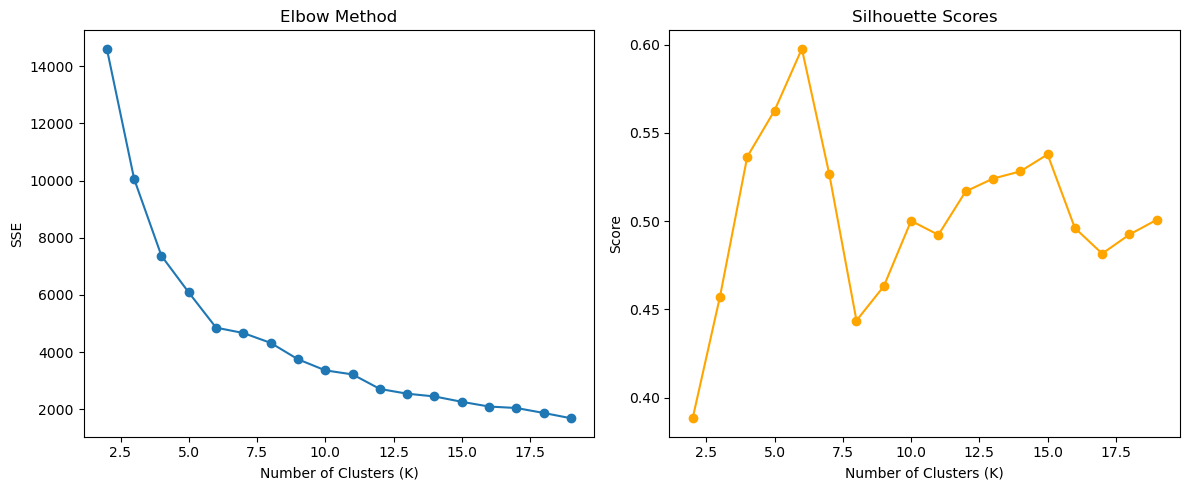

In [89]:
plt.figure(figsize=(12, 5))
plt.subplot(1, 2, 1)
plt.plot(k_range, sse, marker='o')
plt.title('Elbow Method')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('SSE')

plt.subplot(1, 2, 2)
plt.plot(k_range, silhouette_scores, marker='o', color='orange')
plt.title('Silhouette Scores')
plt.xlabel('Number of Clusters (K)')
plt.ylabel('Score')
plt.tight_layout()
plt.savefig('elbow_and_silhouette_plot.png', format='png')
plt.show()

Cluster Centers:
 [[ 4.74911761e-01  7.46940472e-01  2.91950277e-01  1.00000000e+00
  -2.88657986e-15  1.40946282e-18 -1.08420217e-18  4.16333634e-17
   2.02962647e-16 -4.70110062e-16  1.00000000e+00 -3.46944695e-16
  -9.19403442e-17  1.95312500e-03  1.58203125e-02  9.78515625e-01
   1.17187500e-03  1.75781250e-03  7.81250000e-04 -4.60742555e-15]
 [ 5.42555522e-01  7.05344360e-01  2.97865574e-01  1.00000000e+00
  -2.27595720e-15  9.39187603e-04  1.40878140e-03  6.93889390e-17
   1.10354543e-02  3.31063630e-02  7.54167645e-01  1.88072317e-01
   8.68748533e-03  7.37257477e-18  1.40512602e-16 -6.99440506e-15
   1.21430643e-17  5.96311195e-18 -8.99887803e-18  1.00000000e+00]
 [ 5.28629841e-01  7.38835096e-01  2.92660349e-01  6.10622664e-15
   1.00000000e+00  1.73472348e-18  0.00000000e+00 -9.71445147e-17
   2.41129866e-03 -3.97251676e-16  9.89321392e-01  8.26730968e-03
  -7.63278329e-17  2.06682742e-03  1.30899070e-02  9.79676197e-01
   1.72235618e-03  1.07336015e-17  3.44471237e-03 -3.386

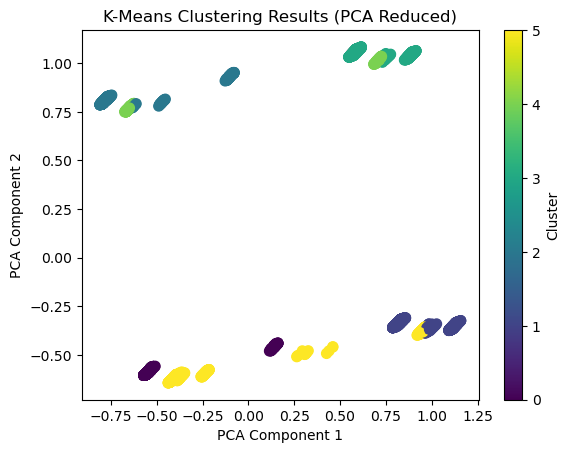

In [93]:
best_k = 6
kmeans = KMeans(n_clusters=best_k, random_state=42)
df = feature_matrix.drop('row_id', axis=1)
df['cluster'] = kmeans.fit_predict(X)

print("Cluster Centers:\n", kmeans.cluster_centers_)
print("Cluster Labels:\n", df['cluster'].value_counts())

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df['cluster'], cmap='viridis', s=50)
plt.title('K-Means Clustering Results (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.savefig('kmeans_pca.png', format='png')
plt.show()

Cluster Centers:
 [[ 5.03786325e-01  7.29812908e-01  2.93299485e-01  1.00000000e+00
  -5.88418203e-15  3.81898033e-04  5.72847050e-04  8.27763987e-02
   7.63796066e-03  1.89994272e-02  7.95493603e-01  8.74546496e-02
   5.63299599e-03  9.54745083e-04  9.26102731e-03  5.59767042e-01
   5.72847050e-04  8.59270575e-04  3.81898033e-04  4.28203170e-01]
 [ 5.43461170e-01  7.25192734e-01  2.96787944e-01  1.22124533e-15
   1.00000000e+00  9.21571847e-19  3.63207728e-18  7.98913043e-02
   2.53623188e-03  6.15942029e-03  8.40217391e-01  7.04710145e-02
  -8.15320034e-17  1.08695652e-03  6.88405797e-03  5.74456522e-01
   9.05797101e-04  5.96311195e-18  1.81159420e-03  4.14855072e-01]]
Cluster Labels:
 cluster2
0    10474
1     5520
Name: count, dtype: int64


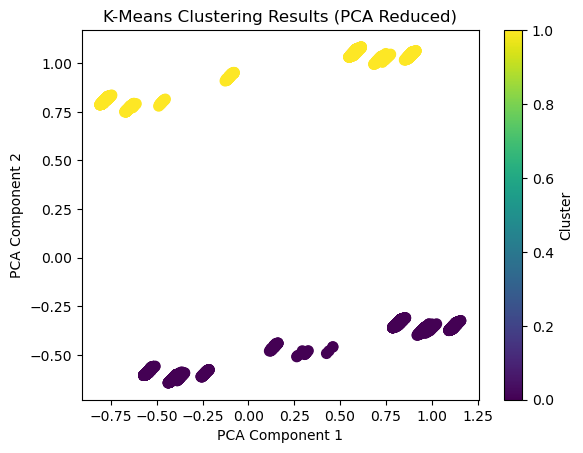

In [99]:
best_k = 2
kmeans = KMeans(n_clusters=best_k, random_state=42)
df['cluster2'] = kmeans.fit_predict(X)

print("Cluster Centers:\n", kmeans.cluster_centers_)
print("Cluster Labels:\n", df['cluster2'].value_counts())

from sklearn.decomposition import PCA

pca = PCA(n_components=2)
reduced_data = pca.fit_transform(X)
plt.scatter(reduced_data[:, 0], reduced_data[:, 1], c=df['cluster2'], cmap='viridis', s=50)
plt.title('K-Means Clustering Results (PCA Reduced)')
plt.xlabel('PCA Component 1')
plt.ylabel('PCA Component 2')
plt.colorbar(label='Cluster')
plt.savefig('kmeans_pca_k=2.png', format='png')
plt.show()

In [101]:
df.head()

,age_at_event,mean_household_income,zip_code,gender_F,gender_M,result_code_<1.00,result_code_>150.00,result_code_Detected,result_code_Negative,result_code_Nonreactive,...,result_code_Reactive,race_primary_American Indian or Alaska Native,race_primary_Asian,race_primary_Black or African American,race_primary_Other Pacific Islander,race_primary_Refuse to answer,race_primary_Unknown racial group,race_primary_White,cluster,cluster2
0,19.826793,75077.030218,63123,False,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,4,1
1,22.509453,75077.030218,63123,False,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,4,1
2,18.583190,75077.030218,63123,False,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,4,1
3,18.245166,75077.030218,63123,False,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,4,1
4,24.629774,75077.030218,63123,False,True,False,False,True,False,False,...,False,False,False,True,False,False,False,False,4,1


In [105]:
df['result_code'] = merged_df['result_code']

df.head()

,age_at_event,mean_household_income,zip_code,gender_F,gender_M,result_code_<1.00,result_code_>150.00,result_code_Detected,result_code_Negative,result_code_Nonreactive,...,race_primary_American Indian or Alaska Native,race_primary_Asian,race_primary_Black or African American,race_primary_Other Pacific Islander,race_primary_Refuse to answer,race_primary_Unknown racial group,race_primary_White,cluster,cluster2,result_code
0,19.826793,75077.030218,63123,False,True,False,False,True,False,False,...,False,False,True,False,False,False,False,4,1,Detected
1,22.509453,75077.030218,63123,False,True,False,False,True,False,False,...,False,False,True,False,False,False,False,4,1,Detected
2,18.583190,75077.030218,63123,False,True,False,False,True,False,False,...,False,False,True,False,False,False,False,4,1,Detected
3,18.245166,75077.030218,63123,False,True,False,False,True,False,False,...,False,False,True,False,False,False,False,4,1,Detected
4,24.629774,75077.030218,63123,False,True,False,False,True,False,False,...,False,False,True,False,False,False,False,4,1,Detected


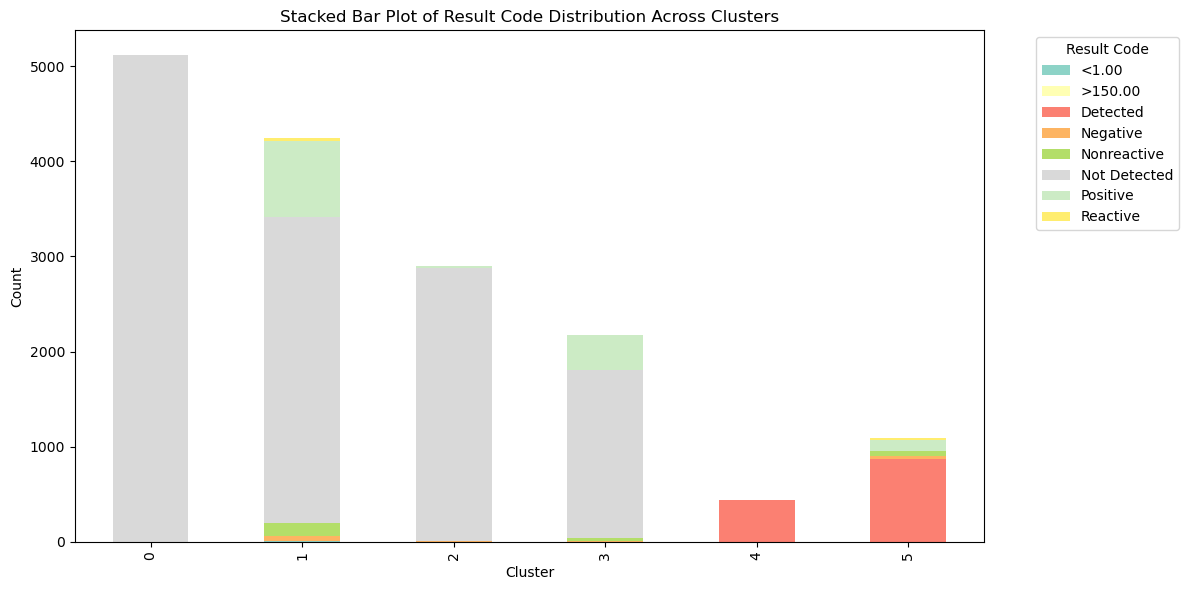

In [115]:
cluster_result_code_counts = df.groupby(['cluster', 'result_code']).size().unstack()

cluster_result_code_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')
plt.title('Stacked Bar Plot of Result Code Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Result Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('result_code_k=6.pdf')
plt.show()

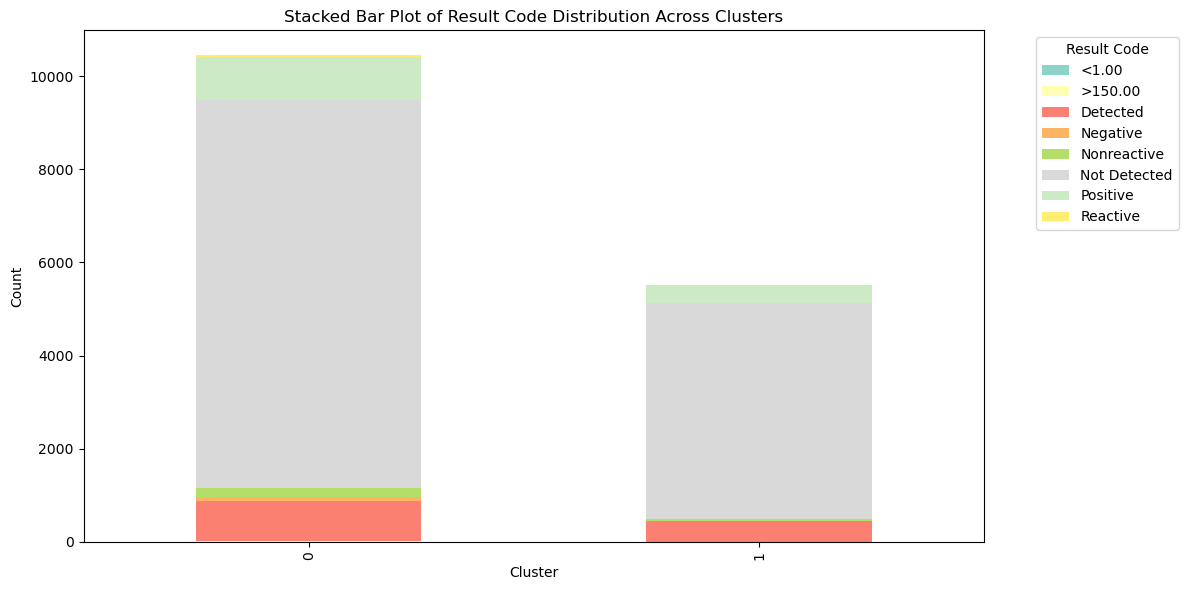

In [117]:
cluster_result_code_counts = df.groupby(['cluster2', 'result_code']).size().unstack()

cluster_result_code_counts.plot(kind='bar', stacked=True, figsize=(12, 6), colormap='Set3')
plt.title('Stacked Bar Plot of Result Code Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Result Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('result_code_k=2.pdf')
plt.show()

In [119]:
df['zip_code'] = merged_df['zip_code']

df.head()

,age_at_event,mean_household_income,zip_code,gender_F,gender_M,result_code_<1.00,result_code_>150.00,result_code_Detected,result_code_Negative,result_code_Nonreactive,...,race_primary_American Indian or Alaska Native,race_primary_Asian,race_primary_Black or African American,race_primary_Other Pacific Islander,race_primary_Refuse to answer,race_primary_Unknown racial group,race_primary_White,cluster,cluster2,result_code
0,19.826793,75077.030218,63123,False,True,False,False,True,False,False,...,False,False,True,False,False,False,False,4,1,Detected
1,22.509453,75077.030218,63123,False,True,False,False,True,False,False,...,False,False,True,False,False,False,False,4,1,Detected
2,18.583190,75077.030218,63123,False,True,False,False,True,False,False,...,False,False,True,False,False,False,False,4,1,Detected
3,18.245166,75077.030218,63123,False,True,False,False,True,False,False,...,False,False,True,False,False,False,False,4,1,Detected
4,24.629774,75077.030218,63123,False,True,False,False,True,False,False,...,False,False,True,False,False,False,False,4,1,Detected


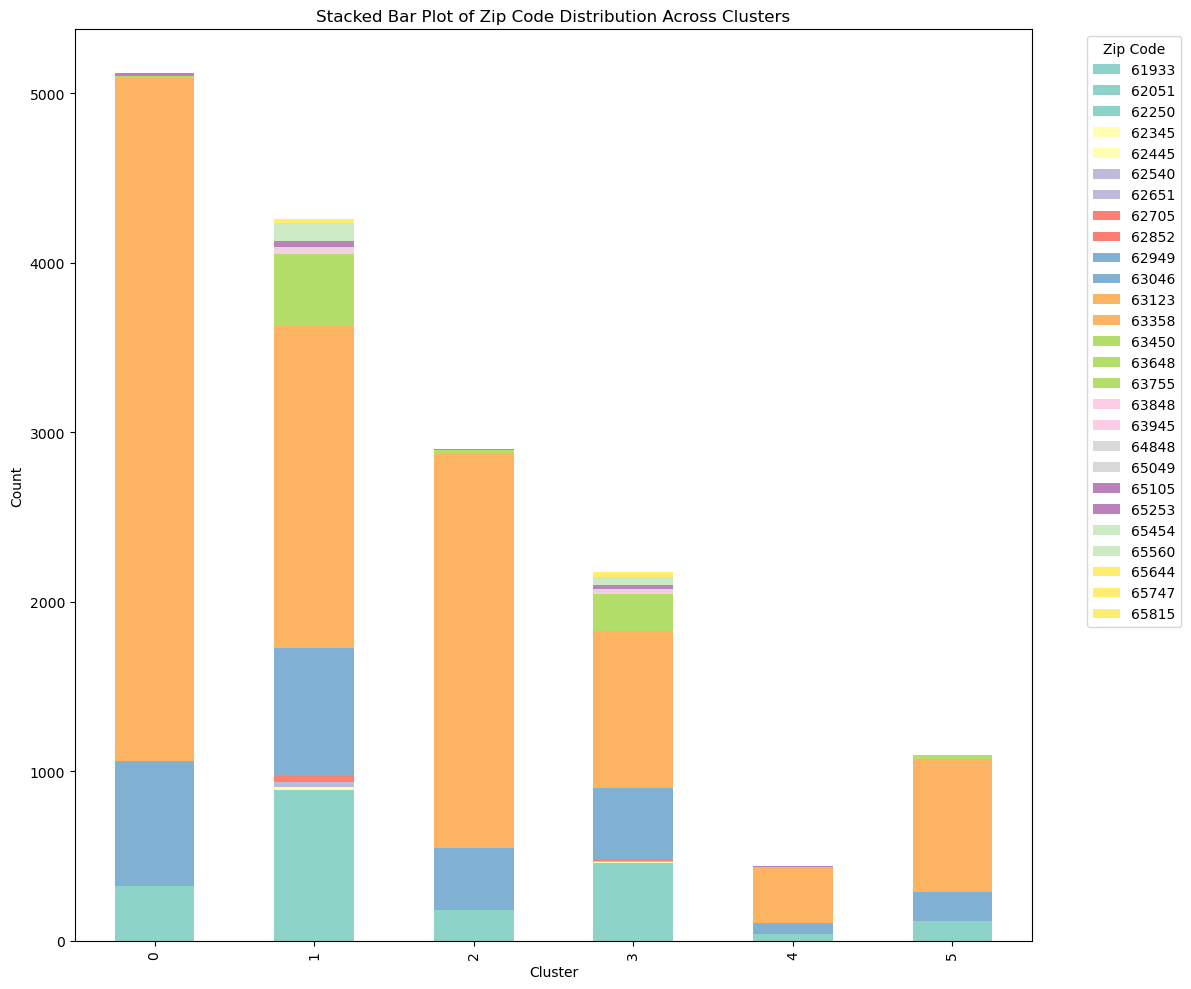

In [129]:
cluster_result_code_counts = df.groupby(['cluster', 'zip_code']).size().unstack()

cluster_result_code_counts.plot(kind='bar', stacked=True, figsize=(12, 10), colormap='Set3')
plt.title('Stacked Bar Plot of Zip Code Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='Zip Code', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('zip_code_k=6.pdf')
plt.show()

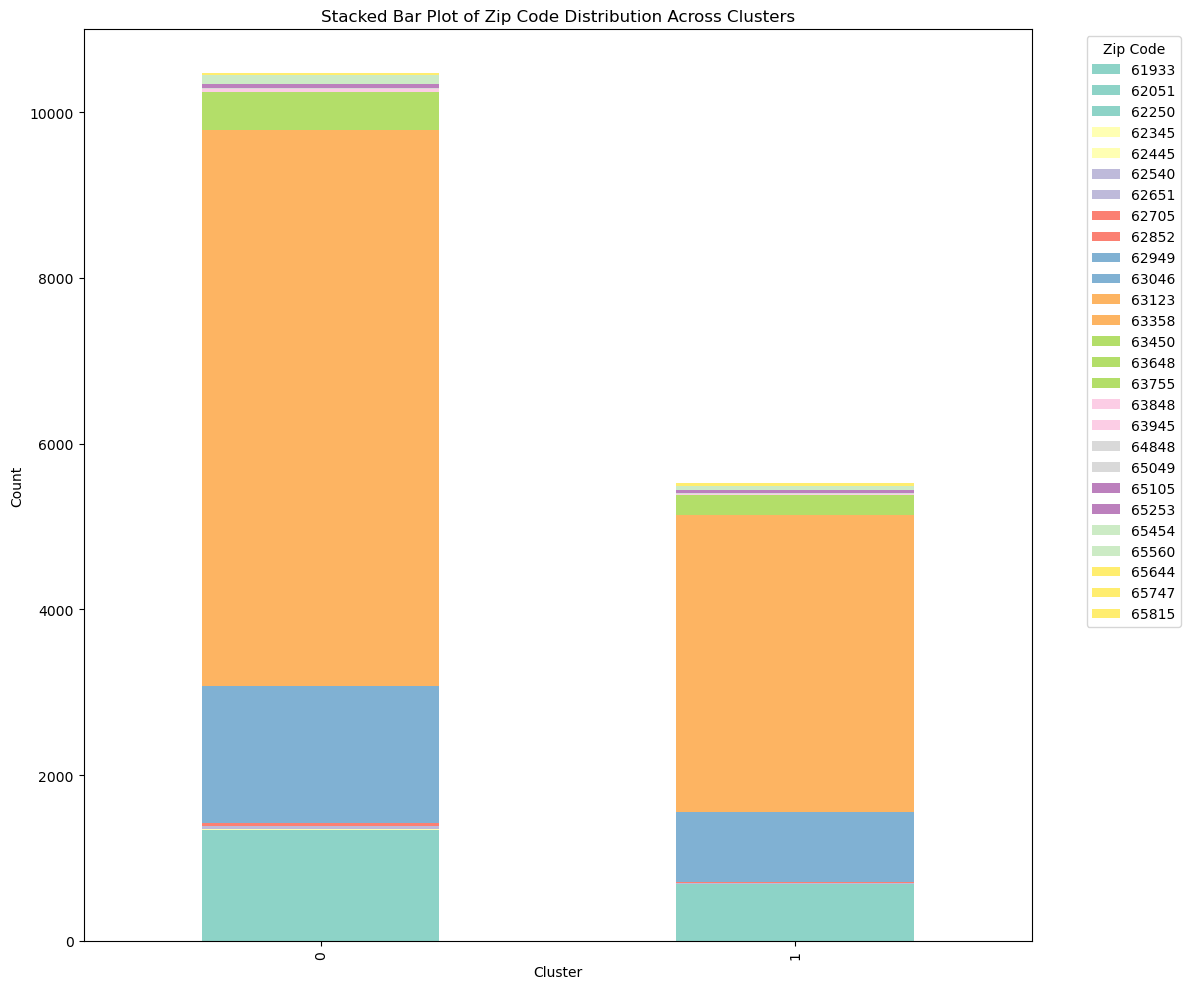

In [131]:
cluster_result_code_counts = df.groupby(['cluster2', 'mean_household_income']).size().unstack()

cluster_result_code_counts.plot(kind='bar', stacked=True, figsize=(12, 10), colormap='Set3')
plt.title('Stacked Bar Plot of Zip Code Distribution Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Count')
plt.legend(title='mean_household_income', bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout()
plt.savefig('zip_code_k=2.pdf')
plt.show()

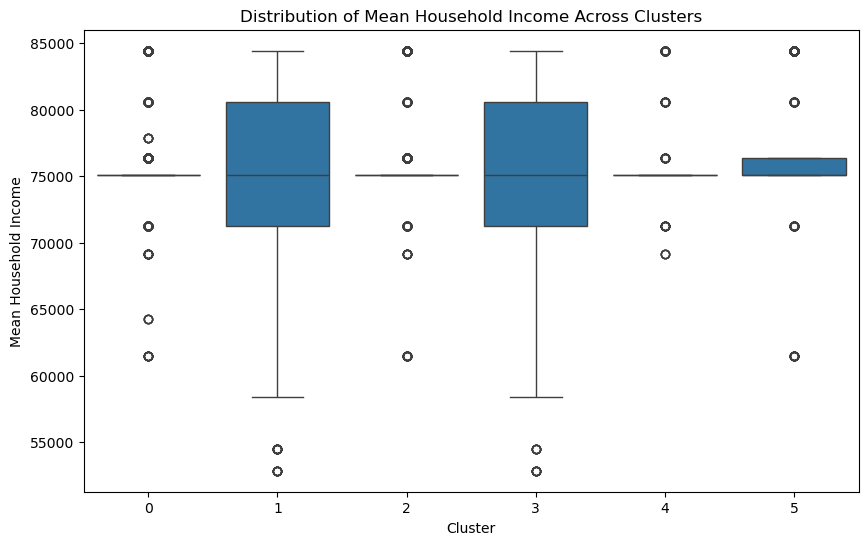

In [133]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster', y='mean_household_income', data=df)
plt.title('Distribution of Mean Household Income Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Mean Household Income')
plt.savefig('mean_household_income_k=6.pdf')
plt.show()

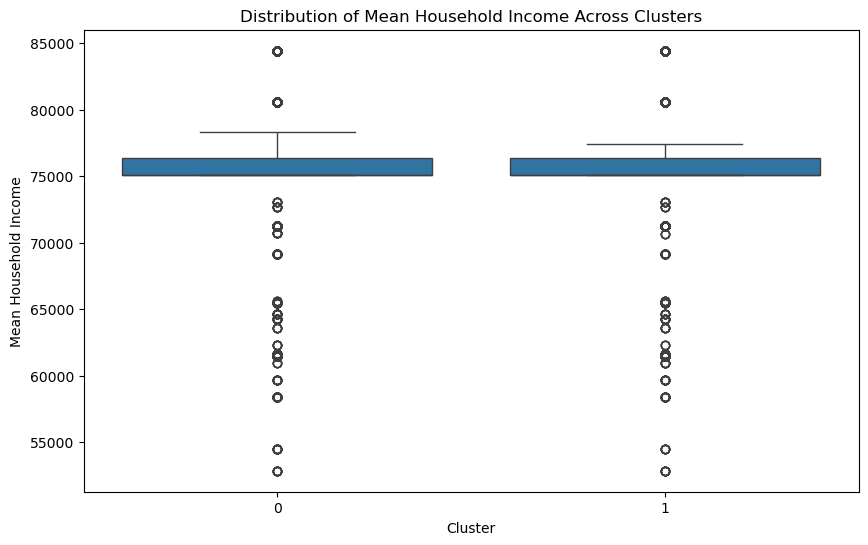

In [135]:
import seaborn as sns

plt.figure(figsize=(10, 6))
sns.boxplot(x='cluster2', y='mean_household_income', data=df)
plt.title('Distribution of Mean Household Income Across Clusters')
plt.xlabel('Cluster')
plt.ylabel('Mean Household Income')
plt.savefig('mean_household_income_k=2.pdf')
plt.show()